<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1/blob/main/Data_Cleaning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction - Importing the data and doing data cleaning

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
import pandas as pd
df = pd.read_csv('chip_dataset.csv')
df.head()


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


# 1. Explore the missingness in the dataset for categorical and numerical data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [4]:
df.describe()

,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4508.000000,800.000000,1685.000000,1278.000000
mean,1615.430790,19033.061063,5403.009359,1096.608263
std,1084.641452,44865.341218,11492.095538,5232.537404
min,100.000000,10.020000,12.800000,3.600000
25%,650.000000,1299.500000,384.000000,59.247500
50%,1400.000000,6136.500000,1248.000000,136.350000
75%,2500.000000,20175.000000,5069.000000,382.450000
max,4700.000000,653700.000000,93240.000000,81720.000000


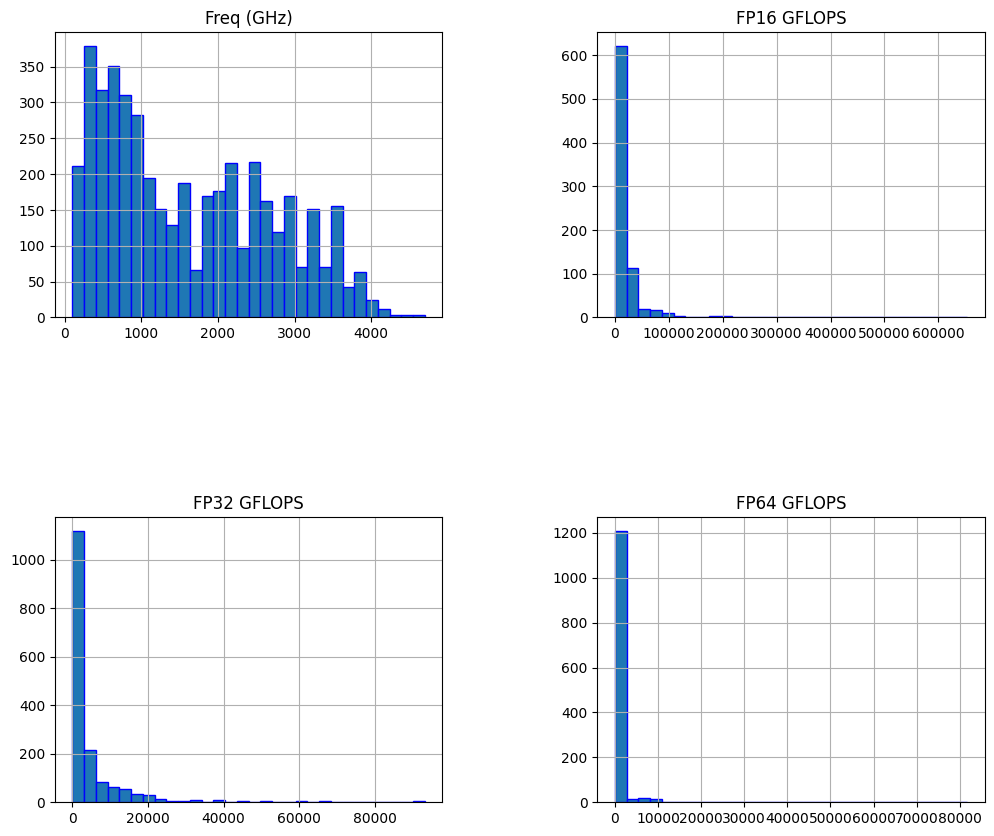

In [5]:
df.hist(figsize=(12, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

From the Exploration.

**2. DATA CLEANING**

**2.1 Missingness**

Text(0.5, 1.0, 'Missing Values Heatmap')

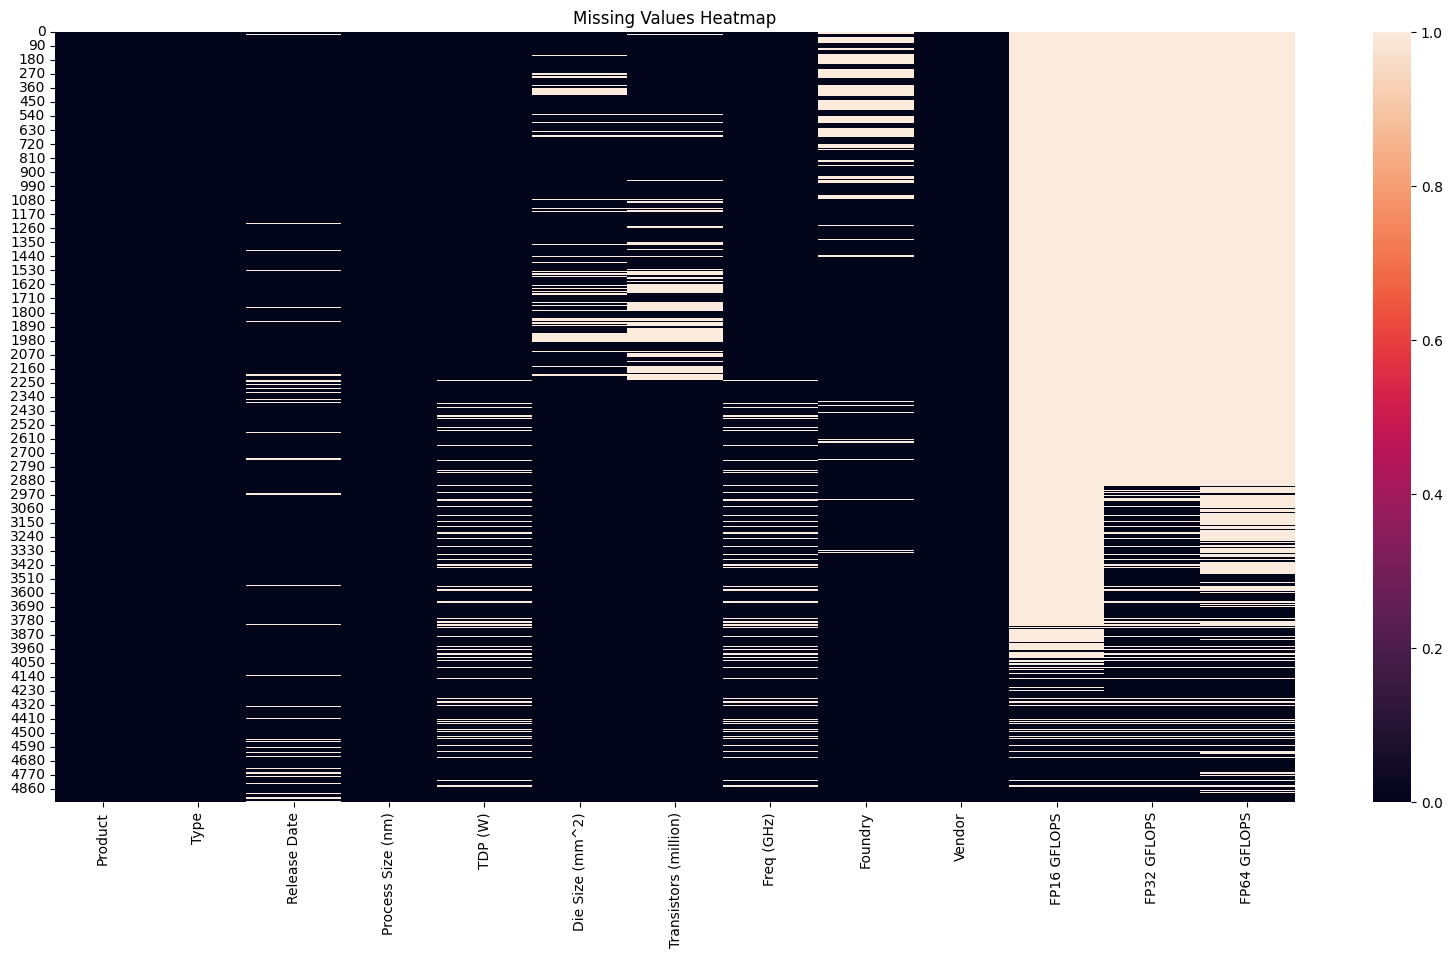

In [6]:
# To explore them further
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap-GPUS')

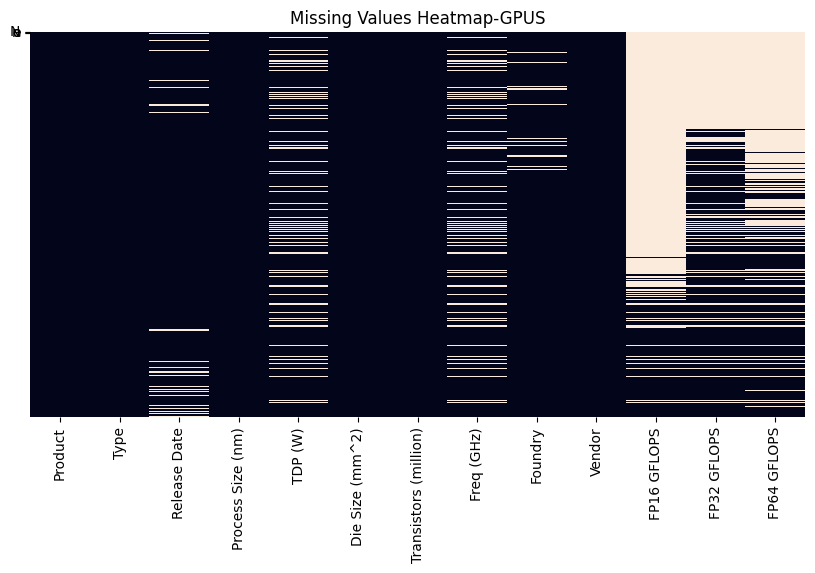

In [30]:
#check whether there is a difference in missingness for GPUS and CPUs
plt.figure(figsize=(10,5))

sns.heatmap(df.loc[df.Type =='GPU'].isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap-GPUS")

Text(0.5, 1.0, 'Missing Values Heatmap - CPUS')

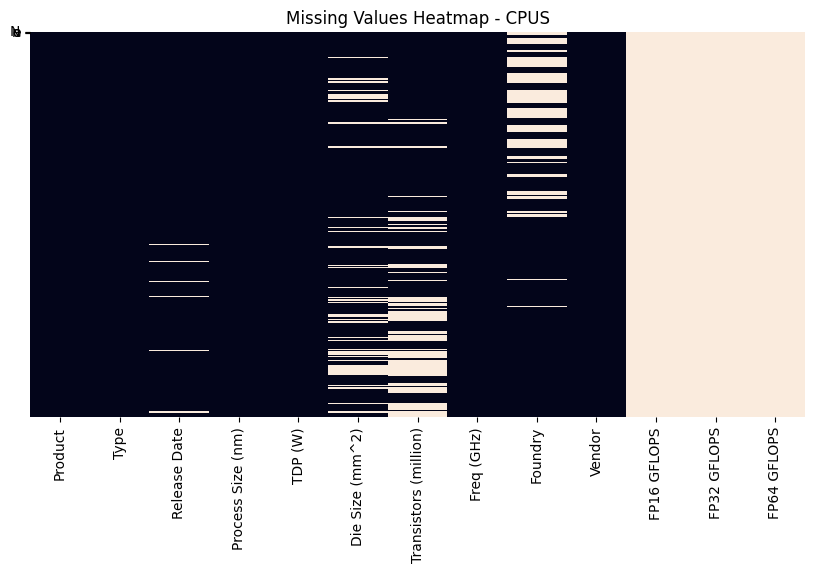

In [10]:
# Check whether there is a difference in missingness for GPUS and CPUs
plt.figure(figsize=(10,5))

sns.heatmap(df.loc[df.Type =='CPU'].isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap - CPUS")

In [11]:
data = df.copy()

### Solving for missingness

In [13]:
# Drop columns with more than 40% missing values
threshold = 40  # Adjust this threshold based on your judgment
data_cleaned = df.dropna(thresh=len(df) - threshold*len(df)/100, axis=1)

# Impute missing values in numerical columns with mean
numerical_cols = data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())

# Impute missing values in categorical columns with mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])

<ipython-input-13-9f69a16597bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())
<ipython-input-13-9f69a16597bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])


In [21]:
data_cleaned["Type"].value_counts()
df["Foundry"].value_counts()
df["Vendor"].value_counts()

Vendor
AMD       1689
Intel     1472
NVIDIA    1191
ATI        499
Matrox      26
XGI         21
3dfx        20
Sony        14
VIA         13
Name: count, dtype: int64

# 2. Dropping Columns

In [22]:
# 3. Drop non-consequntial fields
# Identify non-consequential fields (columns) based on your analysis needs
non_consequential_fields = []

# Drop non-consequential fields from the dataset
data= df.drop(columns=non_consequential_fields)

# Display the resulting dataset
print("Data after dropping non-consequential fields:")
data.head()

Data after dropping non-consequential fields:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


# 3. Transforming Data

In [24]:
# 4. Transform temporal data to their corrrect format (date time)

# Convert to date-time format
data['Release Date'] = pd.to_datetime(data['Release Date'])

# Check the data type to confirm the transformation
print(data['Release Date'].dtype)

datetime64[ns]


<ipython-input-24-060e184c39fe>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Release Date'] = pd.to_datetime(data['Release Date'])


3-INSIGHTS FROM EDA

**3.1 Assumptions**
1. Mores Law still holds, especially in GPUs.

Moore's Law states that the number of transistors on a microchip doubles approximately every two years. To validate this assumption, observe if the "Transistors" attribute follows an upward trend over the years. If the number of transistors tends to double roughly every two years, it would support the validity of Moore's Law.



In [31]:
yearly_progress = data.groupby(data["Release Date"].dt.year)["Transistors (million)"].mean()
# Create a line plot of mean Transistors over the years
plt.figure(figsize=(10, 6))
yearly_progress.plot(color= 'green', marker="o")
plt.title("Mean Transistors Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Transistors (million)")
plt.grid()
plt.show()

TypeError: Could not convert 3737373737373737373737373737424244282814014014014028282828282814141414143030unknownunknownunknown51513030303030303030252525202020202020202025252020155454 to numeric

**2. Dannard Scaling is still valid in general**

In semiconductor electronics, Dennard scaling, also known as MOSFET scaling, is a scaling law which states roughly that, as transistors get smaller, their power density stays constant, so that the power use stays in proportion with area; both voltage and current scale (downward) with length.

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Die Size",
           y="TDP",
           data=data_cleaned,
           hue="Type")
plt.title('CHANGES IN TRANSISTOR SIZE AND CORRESPONDING VALUES IN TRANSISTOR POWER DENSITY')

ValueError: Could not interpret value `Die Size` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

**3. CPUS HAVE HIGHER FREQUENCY BUT GPUS ARE CATCHING UP**

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Release Date",
           y="Freq (MHz)",
           data=data,
           hue="Type", # The type is the classification of whether the chip is a GPU or a CPU
           alpha = 0.1) # Controls the level of transparency
plt.title('CPUS have higher Frequency but GPUs are catching up'.upper())

ValueError: Could not interpret value `Freq (MHz)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

**4. GPU PERFORMANCE DOUBLES EVERY 1.5 YEARS.**

<ipython-input-36-484323039338>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.scatterplot(x=pd.to_datetime(df["Release Date"]),


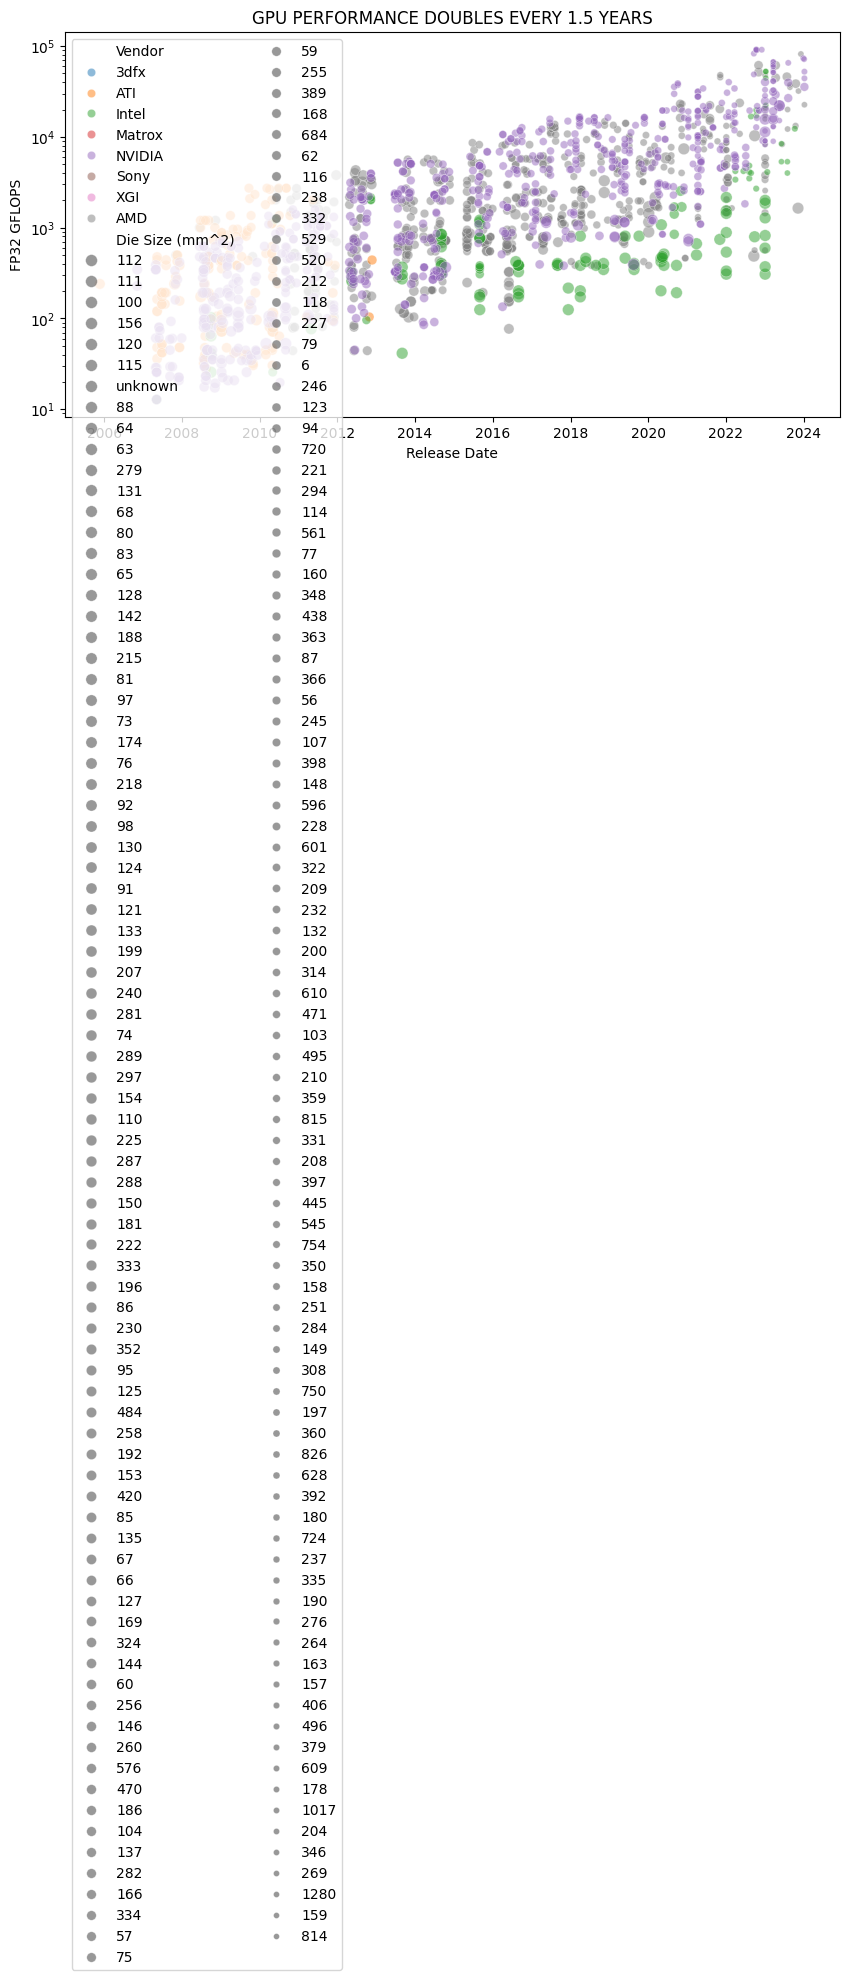

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pd.to_datetime(df["Release Date"]),
           y="FP32 GFLOPS",
           data=df.loc[df.Type =='GPU'],
           hue="Vendor",
           size='Die Size (mm^2)',
           alpha = 0.5)
plt.title('GPU PERFORMANCE DOUBLES EVERY 1.5 YEARS'.upper())
plt.yscale("log")
plt.legend(loc=2,ncols=2)
sns.set_palette('bright',n_colors=5)

**5. GPU PERFORMANCE IMPROVEMENT IS A JOINT EFFECT OF SMALLER TRANSISTORS, LARGER DIE SIZE, AND HIGHER FREQUENC**Y

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Transistors (million)',
           y="FP32 GFLOPS",
           data=df.loc[df.Type =='GPU'],
           hue='Freq (MHz)',
           size='Die Size (mm^2)',
           alpha = 1)
sns.set_palette('pastel',n_colors=5)
plt.legend(loc=2,fontsize=15,ncols=2)
plt.yscale("log")
plt.xscale("log")
plt.title('GPU PERFORMANCE IMPROVEMENT IS A JOINT EFFECT OF SMALLER TRANSISTORS, LARGER DIE SIZE, AND HIGHER FREQUENCY')

ValueError: Could not interpret value `Freq (MHz)` for `hue`. An entry with this name does not appear in `data`.

<Figure size 2000x1000 with 0 Axes>